In [1]:
# Pair Plot Code

In [2]:
# import pandas dataframe
import pandas as pd

#import numpy
import numpy as np

# import pyplot from matplotlib
import matplotlib.pyplot as plt

# import seaborn library
import warnings # ignore useless seaborn warnings
warnings.filterwarnings("ignore")
import seaborn as sns

sns.set(style="white", color_codes=True)

# data to read
f = 'C:\\Users\\Ronald\\Documents\\EECS 731\\Homework2\\Shakespeare_data.csv'

# Take every 100th row
n = 100

# total lines of file
num_lines = sum(1 for l in open(f))

# skiprow indices to skip (exclude header)
skip = [x for x in range(1, num_lines) if x % n != 0]

# load Shakespeare dataset
# get rid of filter out delimiters (commas) in data
shake = pd.read_csv(f, skiprows=skip, sep=',')

# forward fill and backward fill any missing values (blank fields)
shake = shake.fillna(method='ffill').fillna(method='bfill')
shake.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,100,Henry IV,8,1.1.97,WESTMORELAND,"Malevolent to you in all aspects,"
1,200,Henry IV,29,1.2.86,FALSTAFF,to corrupt a saint. Thou hast done much harm upon
2,300,Henry IV,61,1.2.86,POINS,Exit Poins
3,400,Henry IV,7,1.3.72,SIR WALTER BLUNT,Whate'er Lord Harry Percy then had said
4,500,Henry IV,22,1.3.170,HOTSPUR,"The cords, the ladder, or the hangman rather?"


In [3]:
# see which features give best information

In [4]:
# need to encode Play, PlayerLinenumber, ActSceneLine, Player, and PlayerLine to get better information from data
# use label encoding
shake_enc = shake.copy()

from sklearn.preprocessing import LabelEncoder

lb_enc = LabelEncoder()
shake_enc['Play_Code'] = lb_enc.fit_transform(shake['Play'])
shake_enc['ActSceneLine_Code'] = lb_enc.fit_transform(shake['ActSceneLine'])
shake_enc['PlayerLinenumber_Code'] = lb_enc.fit_transform(shake['PlayerLinenumber'])
shake_enc['PlayerLine_Code'] = lb_enc.fit_transform(shake['PlayerLine'])

# remove values from non-encoded values from dataframe
shake_enc.drop(['Dataline','Play','ActSceneLine', 'PlayerLinenumber','PlayerLine'], axis=1, inplace=True)
shake_enc.head() #Results in appending a new column to df

,Player,Play_Code,ActSceneLine_Code,PlayerLinenumber_Code,PlayerLine_Code
0,WESTMORELAND,9,67,7,494
1,FALSTAFF,9,118,28,1079
2,POINS,9,118,60,249
3,SIR WALTER BLUNT,9,159,6,868
4,HOTSPUR,9,134,21,712


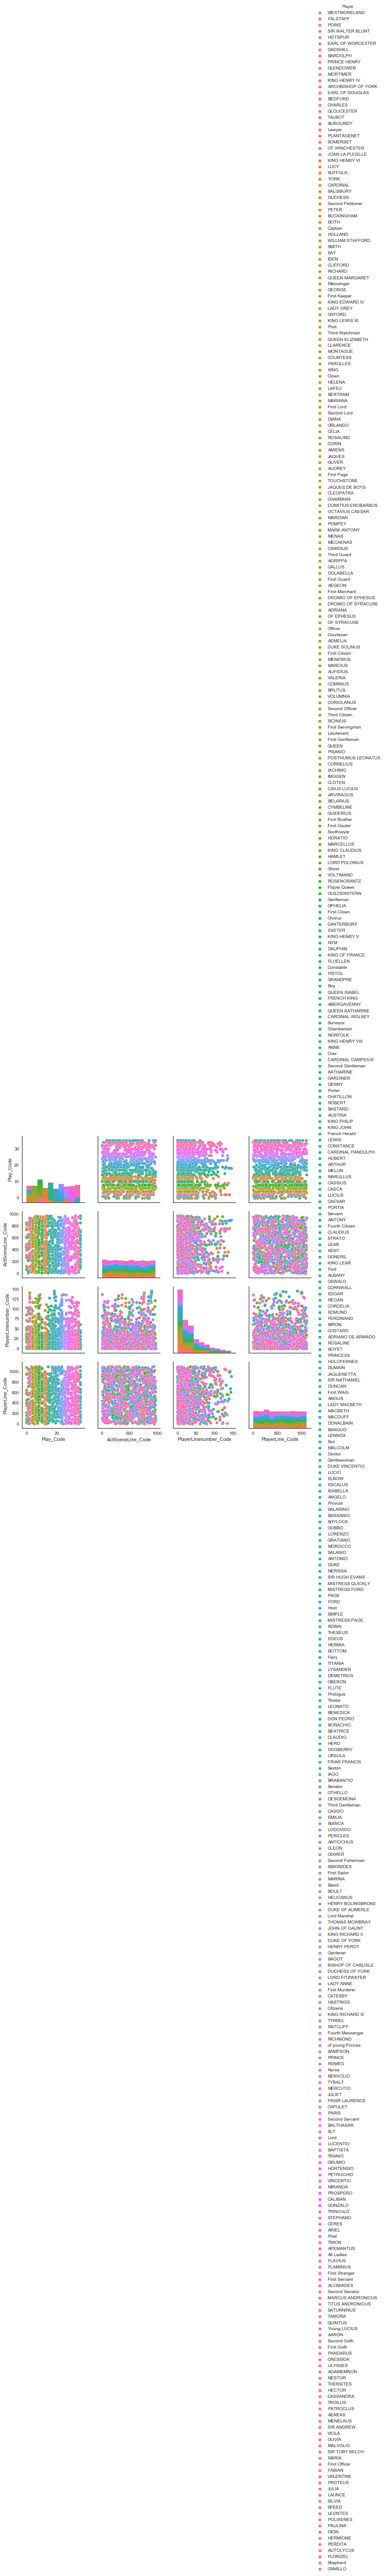

In [5]:
# add a pair plot to see distribution of players
sns.pairplot(shake_enc, hue="Player")

In [6]:
# Linear SVM classifier
# add in label encoding of the player column
shake_enc['Player_Code'] = lb_enc.fit_transform(shake['Player'])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
# create training sets and test sets (80-20 split)
matrix = shake_enc[['Play_Code', 'PlayerLine_Code']].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(matrix, shake_enc['Player_Code'], test_size=0.2)

In [8]:
# linear svm classifier
clf = svm.SVC(kernel='linear')

# train model with training sets
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# predict response for test set
y_pred = clf.predict(X_test)

#calculate accuracy of model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.13004484304932734


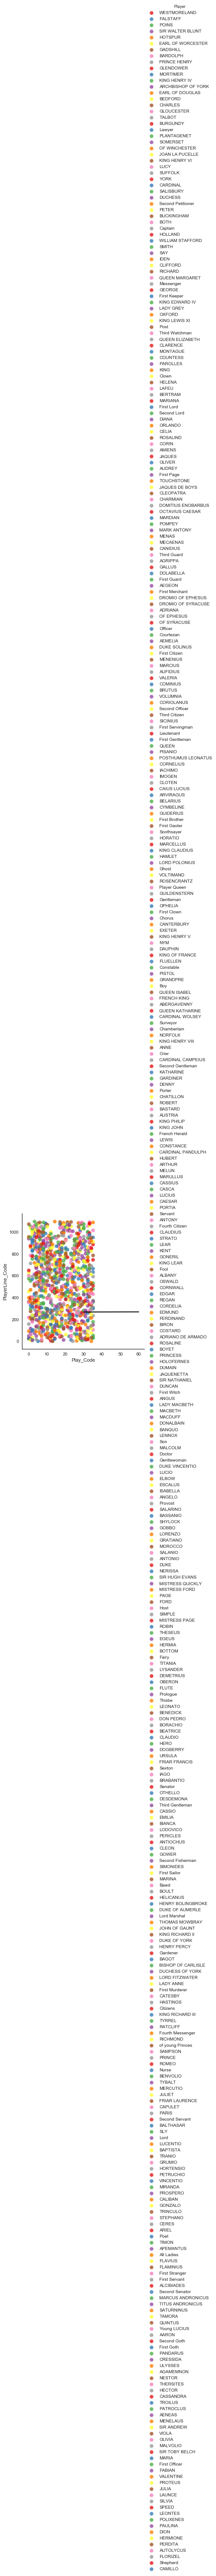

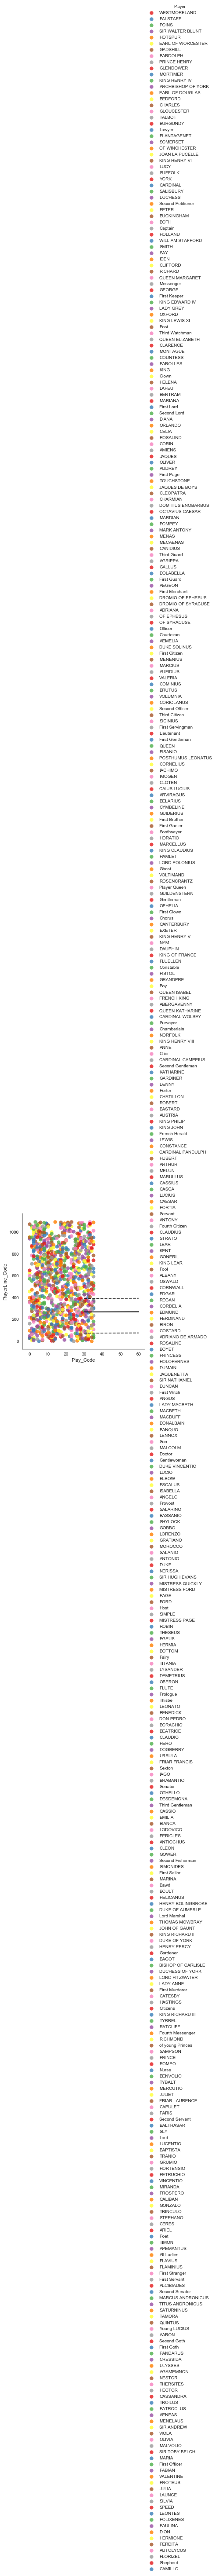

In [13]:
# Vizualization

# get separating hyperplane

w = clf.coef_[0]

a = -w[0] / w[1]

xx = np.linspace(30, 60)

yy = a * xx - (clf.intercept_[0]) / w[1]



# plot parallels to separating hyperplane that pass through support vectors

b = clf.support_vectors_[0]

yy_down = a * xx + (b[1] - a * b[0])

b = clf.support_vectors_[-1]

yy_up = a * xx + (b[1] - a * b[0])



# plot the hyperplane

sns.lmplot('Play_Code', 'PlayerLine_Code', data=shake_enc, hue='Player', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black');





# choose hyperplane with max margin

sns.lmplot('Play_Code', 'PlayerLine_Code', data=shake_enc, hue='Player', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black')

plt.plot(xx, yy_down, 'k--')

plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none');

In [11]:
# add another feature
# arbitrarily choose ActSceneLine as it seems promising
matrix1 = shake_enc[['Play_Code', 'PlayerLine_Code','ActSceneLine_Code']].as_matrix()
X1_train, X1_test, y1_train, y1_test = train_test_split(matrix, shake_enc['Player_Code'], test_size=0.2)

clf1 = svm.SVC(kernel='linear')
clf1.fit(X1_train, y1_train)


y1_pred = clf1.predict(X1_test)
print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.14349775784753363
